SHAP

In [4]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 26.5 MB/s eta 0:00:00


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import shap
import pandas as pd


# Load dataset
df = pd.read_csv("https://github.com/dssg/aequitas/raw/master/examples/data/compas_for_aequitas.csv")
df.drop_duplicates()

df_encoded = pd.get_dummies(df, columns=['race', 'sex', 'age_cat'])

# Display encoded data
df_encoded.head()

,entity_id,score,label_value,race_African-American,race_Asian,race_Caucasian,race_Hispanic,race_Native American,race_Other,sex_Female,sex_Male,age_cat_25 - 45,age_cat_Greater than 45,age_cat_Less than 25
0,1,0.0,0,False,False,False,False,False,True,False,True,False,True,False
1,3,0.0,1,True,False,False,False,False,False,False,True,True,False,False
2,4,0.0,1,True,False,False,False,False,False,False,True,False,False,True
3,5,1.0,0,True,False,False,False,False,False,False,True,False,False,True
4,6,0.0,0,False,False,False,False,False,True,False,True,True,False,False


In [6]:
from sklearn.metrics import accuracy_score
# Separate the features and target variable
X = df_encoded.drop(columns=['label_value', 'entity_id', 'score'])
y = df_encoded['label_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.columns = X_train.columns.str.replace(' ', '_')
X_test.columns = X_test.columns.str.replace(' ', '_')


# Train a RandomForest model
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Make predictions on the test set
y_pred_rfc = model_rfc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rfc)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.6152424942263279


(2165, 11, 2)


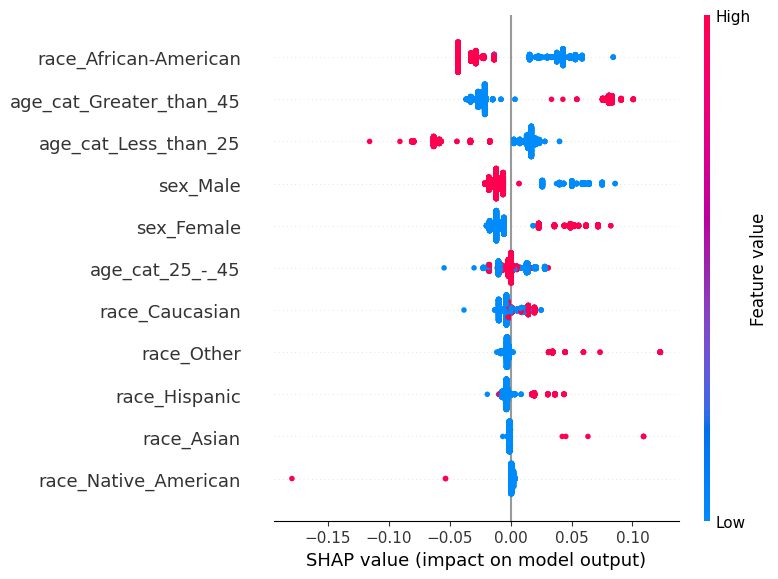

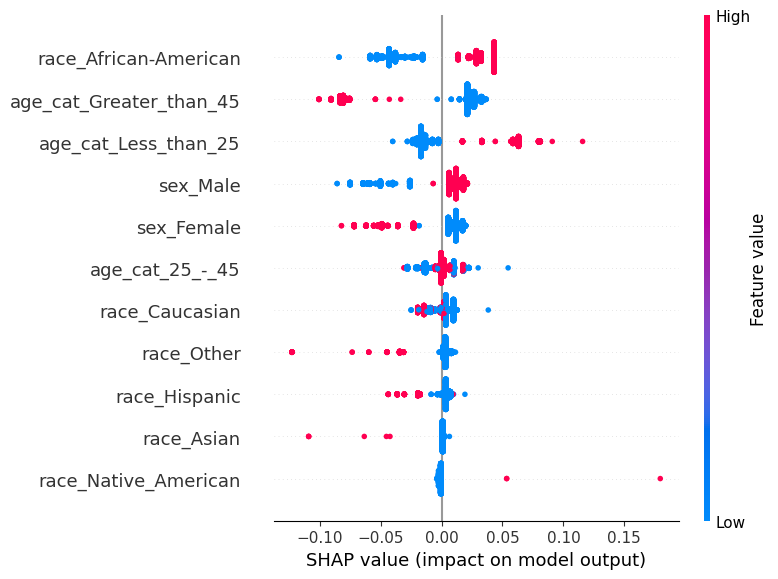

In [ ]:
# Initialize SHAP explainer
explainer_rfc = shap.TreeExplainer(model_rfc)

# Get SHAP values for the test set
shap_values_rfc = explainer_rfc.shap_values(X_test)

print(shap_values_rfc.shape)
# print(X_test.columns)
# print(shap_values[0].shape)

# Plot SHAP summary plot for feature importance
shap.summary_plot(shap_values_rfc[:,:, 0], X_test, feature_names=X_test.columns)
shap.summary_plot(shap_values_rfc[:,:, 1], X_test, feature_names=X_test.columns)

In [ ]:
from lightgbm import LGBMClassifier
# Initialize and train the LightGBM model
model_lgbm = LGBMClassifier()
model_lgbm.fit(X_train, y_train)

y_pred_lgbm = model_lgbm.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_lgbm)
print(f"Model Accuracy: {accuracy}")


[LightGBM] [Info] Number of positive: 2293, number of negative: 2756
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000279 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 20
[LightGBM] [Info] Number of data points in the train set: 5049, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.454149 -> initscore=-0.183919
[LightGBM] [Info] Start training from score -0.183919
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

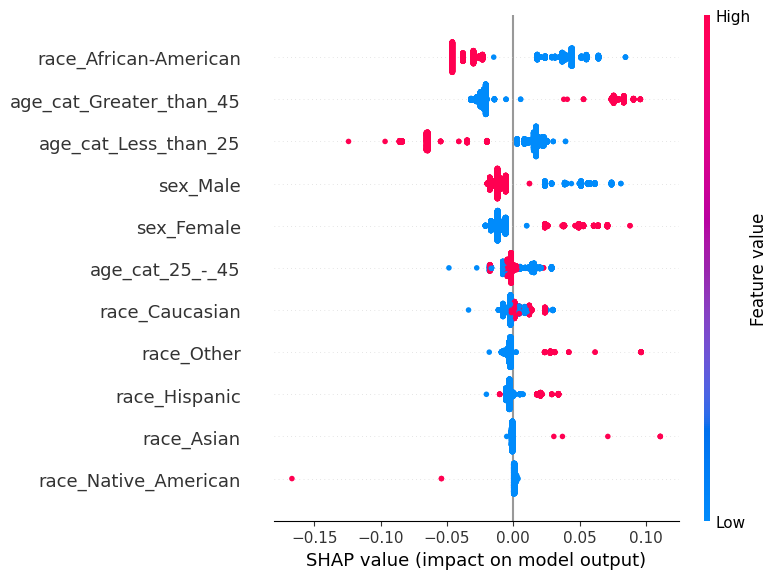

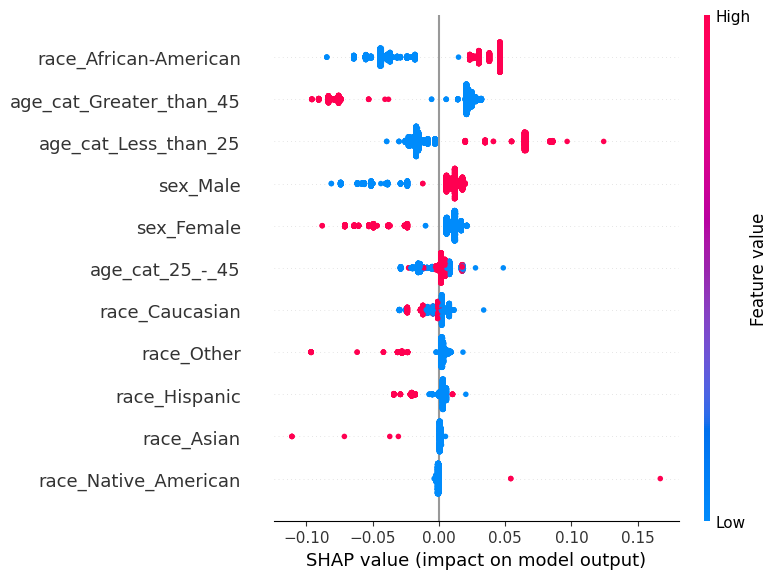

In [ ]:
# Initialize SHAP explainer
explainer_lgbm = shap.TreeExplainer(model_lgbm)

# Get SHAP values for the test set
shap_values_lgbm = explainer.shap_values(X_test)

# Plot SHAP summary plot for feature importance
shap.summary_plot(shap_values_lgbm[:,:, 0], X_test, feature_names=X_test.columns)
shap.summary_plot(shap_values_lgbm[:,:, 1], X_test, feature_names=X_test.columns)

LIME

In [1]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=6419aaa5c388c87567c7aaf92fb990596c1a9fff39dc4c1f9db5073424beac5d
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [2]:
import lime
import lime.lime_tabular

In [24]:
# Initialize LIME explainer
X_train_np = X_train.astype(int).values  # Convert pandas DataFrame to NumPy array
X_test_np = X_test.astype(int).values    # Convert pandas DataFrame to NumPy array

# Ensure that feature names match the structure of the DataFrame and are passed correctly
feature_names = X_test.columns.tolist()
explainer_lime_rfc = lime.lime_tabular.LimeTabularExplainer(X_train_np, feature_names=feature_names, class_names=['0', '1'])


In [34]:
# Select an instance from X_test to explain
print(feature_names)
print(X_test.values[15])
print(y_test.values[15])
instance_to_explain = X_test_np[15]  # This should be a NumPy array now

# Generate explanation using the predict_proba function of your trained model
exp = explainer_lime_rfc.explain_instance(instance_to_explain, model_rfc.predict_proba, num_features=len(feature_names))

# Display the explanation
exp.show_in_notebook(show_table=True, show_all=False)

['race_African-American', 'race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Native_American', 'race_Other', 'sex_Female', 'sex_Male', 'age_cat_25_-_45', 'age_cat_Greater_than_45', 'age_cat_Less_than_25']
[ True False False False False False False  True False False  True]
0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
